In [1]:
from math import sin, cos, pi
from fem.system import solve_system

import numpy as np
import imp

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import logging
imp.reload(logging)
logging.basicConfig(filename='log.txt', level=logging.DEBUG)
logger = logging.getLogger(__name__)
logging.info('Well?')


### When a =1, b = 0, c = 0

Choose \\(a=1, b = 0, c = 0\\) then the equation becomes:
\\[
 -\nabla^2u = f
\\]

and choosing \\(u = \sin{(\pi x)}\sin{(\pi y)}\\) we already know the exact solution and the above equation becomes:

\\[
 f = 2\pi^2\sin{(\pi x)}\sin{(\pi y)}
\\]

### Define the Problem

In [2]:
def exact(x, y):
    return sin(pi * x) * sin(pi * y)

parameters = (1,  [0, 0], 1)

def known_nodes(v):
    return abs(v[0]) == 1 or abs(v[1]) == 1 or v[0] == 0 or v[1] == 0

def f(x, y):
      return (2*pi**2) * (sin(pi * x)) * (sin(pi * y))   

### Solution

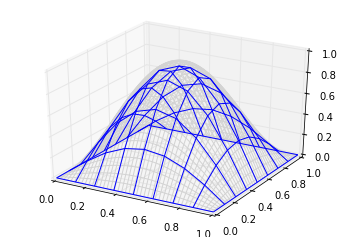

In [3]:
# Setup the axis to plot on
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Plot the exact solution
X = np.linspace(0,1,128)
Y = np.linspace(0,1,128)
X, Y = np.meshgrid(X, Y)
Z = np.sin(pi * X) * np.sin(pi * Y)
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color='lightgrey')

err = []

for N in [4, 8, 16, 32]:
    # Solve the system
    results = solve_system(parameters, known_nodes, f, N, exact)
    
    if N == 8:
        # Plot our approximation
        xs, ys = results['grid']
        U = results['U']
        ax.plot_wireframe(xs, ys, U, color='blue')
        
    err.append((N, results['err']))

In [4]:
results['N'], results['U'].max()

(32, 0.99743256694401705)

In [5]:
err

[(4, 0.1276476454887518),
 (8, 0.06253666303434297),
 (16, 0.031250338366742424),
 (32, 0.01562500277783788)]

### When a = 1, b = 0, c = 1

Choose \\(a=1, b = 0, c = 1\\) then the equation becomes:
\\[
 -\nabla^2u + u = f
\\]

and choosing \\(u = \sin{(\pi x)}\sin{(\pi y)}\\) we already know the exact solution and the above equation becomes:

\\[
 f = 2\pi^2\sin{(\pi x)}\sin{(\pi y)} + \sin{(\pi x)}\sin{(\pi y)}
\\]

In [6]:
def exact(x, y):
    return sin(pi * x) * sin(pi * y)

parameters = (1,  [0, 0], 1)

def known_nodes(v):
    return abs(v[0]) == 1 or abs(v[1]) == 1 or v[0] == 0 or v[1] == 0

def f(x, y):
      return (2*pi**2) * (sin(pi * x)) * (sin(pi * y)) + (sin(pi * x) * sin(pi * y))

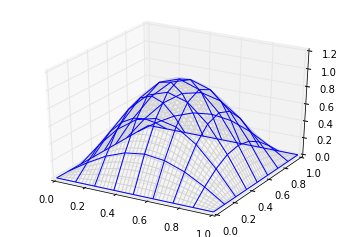

In [7]:
# Setup the axis to plot on
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the exact solution
X = np.linspace(0,1,128)
Y = np.linspace(0,1,128)
X, Y = np.meshgrid(X, Y)
Z = np.sin(pi * X) * np.sin(pi * Y)
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color='lightgrey')

err = []

for N in [4, 8, 16, 32]:
    # Solve the system
    results = solve_system(parameters, known_nodes, f, N, exact)
    
    if N == 8:
        # Plot our approximation
        xs, ys = results['grid']
        U = results['U']
        ax.plot_wireframe(xs, ys, U, color='blue')
        
    err.append((N, results['err']))

In [8]:
err

[(4, 0.1279195610159639),
 (8, 0.06254047063948526),
 (16, 0.03125037351866793),
 (32, 0.01562500306642098)]

In [9]:
results['N'], results['U'].max()

(32, 1.0479630910871087)

### When a = 1, b = 0, c = 10

Choose \\(a=1, b = 0, c = 10\\) then the equation becomes:
\\[
 -\nabla^2u + 10u = f
\\]

and choosing \\(u = \sin{(\pi x)}\sin{(\pi y)}\\) we already know the exact solution and the above equation becomes:

\\[
 f = 2\pi^2\sin{(\pi x)}\sin{(\pi y)} + 10\sin{(\pi x)}\sin{(\pi y)}
\\]

In [10]:
def exact(x, y):
    return sin(pi * x) * sin(pi * y)

parameters = (1,  [0, 0], 10)

def known_nodes(v):
    return abs(v[0]) == 1 or abs(v[1]) == 1 or v[0] == 0 or v[1] == 0

def f(x, y):
      return (2*pi**2) * (sin(pi * x)) * (sin(pi * y)) + 10 * (sin(pi * x) * sin(pi * y))

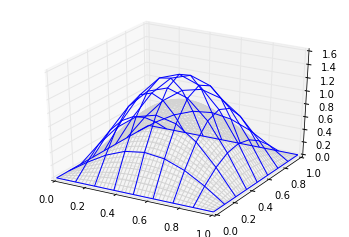

In [11]:
# Setup the axis to plot on
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the exact solution
X = np.linspace(0,1,128)
Y = np.linspace(0,1,128)
X, Y = np.meshgrid(X, Y)
Z = np.sin(pi * X) * np.sin(pi * Y)
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color='lightgrey')

err3 = []

for N in [4, 8, 16, 32]:
    # Solve the system
    results3 = solve_system(parameters, known_nodes, f, N, exact)
    
    if N == 8:
        # Plot our approximation
        xs, ys = results3['grid']
        U = results3['U']
        ax.plot_wireframe(xs, ys, U, color='blue')
        
    err3.append((N, results3['err']))

In [22]:
results['A']

array([[ 4.00048828, -1.00008138,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.00008138,  4.00048828, -1.00008138, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -1.00008138,  4.00048828, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  4.00048828,
        -1.00008138,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -1.00008138,
         4.00048828, -1.00008138],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.00008138,  4.00048828]])

In [12]:
results3['N'], results3['U'].max()

(32, 1.5005433636584409)

In [13]:
err3

[(4, 0.12993524724399633),
 (8, 0.06257782861815321),
 (16, 0.03125075149864004),
 (32, 0.015625006263025334)]

### When a =1, b = [1, 0], c = 0

Choose \\(a=1, b = [1, 0], c = 0\\) then the equation becomes:
\\[
 -\nabla^2u + (1, 0) \cdot \nabla u = f
\\]

and choosing \\(u = \sin{(\pi x)}\sin{(\pi y)}\\) we already know the exact solution and the above equation becomes:

\\[
 f = 2\pi^2\sin{(\pi x)}\sin{(\pi y)} + \pi\cos{(\pi x)}\sin{(\pi y)}
\\]

In [14]:
def exact(x, y):
    return sin(pi * x) * sin(pi * y)

parameters = (1,  [1, 0], 0)

def known_nodes(v):
    return abs(v[0]) == 1 or abs(v[1]) == 1 or v[0] == 0 or v[1] == 0

def f(x, y):
      return (2*pi**2) * (sin(pi * x)) * (sin(pi * y)) + pi * (cos(pi * x) * sin(pi * y))

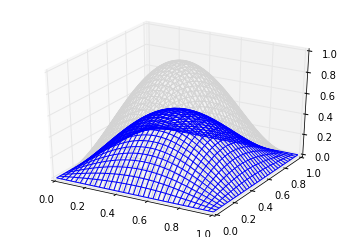

In [15]:
# Setup the axis to plot on
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the exact solution
X = np.linspace(0,1,128)
Y = np.linspace(0,1,128)
X, Y = np.meshgrid(X, Y)
Z = np.sin(pi * X) * np.sin(pi * Y)
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color='lightgrey')

err3 = []

for N in [4, 8, 16, 32]:
    # Solve the system
    results3 = solve_system(parameters, known_nodes, f, N, exact)
    
    if N == 32:
        # Plot our approximation
        xs, ys = results3['grid']
        U = results3['U']
        ax.plot_wireframe(xs, ys, U, color='blue')
        
    err3.append((N, results3['err']))

In [16]:
results3['N'], results3['U'].max()

(32, 0.55490817288721972)

In [17]:
err3

[(4, 0.12766836969549292),
 (8, 0.06253413751260763),
 (16, 0.03125024701759206),
 (32, 0.015625001319378523)]

In [18]:
def exact(x, y):
    return sin(pi * x) * sin(pi * y)

parameters = (0,  [0, 0], 1)

def known_nodes(v):
    return abs(v[0]) == 1 or abs(v[1]) == 1 or v[0] == 0 or v[1] == 0

def f(x, y):
      return (sin(pi * x) * sin(pi * y))

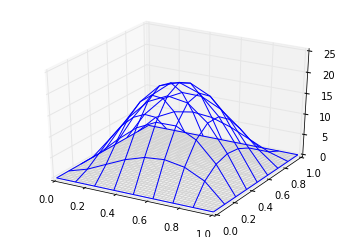

In [19]:
# Setup the axis to plot on
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the exact solution
X = np.linspace(0,1,128)
Y = np.linspace(0,1,128)
X, Y = np.meshgrid(X, Y)
Z = np.sin(pi * X) * np.sin(pi * Y)
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color='lightgrey')

err3 = []

for N in [4, 8, 16, 32]:
    # Solve the system
    results3 = solve_system(parameters, known_nodes, f, N, exact)
    
    if N == 8:
        # Plot our approximation
        xs, ys = results3['grid']
        U = results3['U']
        ax.plot_wireframe(xs, ys, U, color='blue')
        
    err3.append((N, results3['err']))

In [20]:
results3['N'], results3['U'].max()

(32, 330.81692186529119)

In [21]:
err3

[(4, 0.1690603753214421),
 (8, 0.06641819575001676),
 (16, 0.0314331780262545),
 (32, 0.01563179463153326)]